<a href="https://colab.research.google.com/github/Aditya100300/ML_Projects/blob/master/MNIST_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Problem understanding, Data Import, EDA >> Notebooks to be submitted latest: June 2nd.

2. Feature Engineering/Selection, Dimensionality Reduction with reasonings. Submission Deadline: 8th June.

3. Apply ML/DL algos & Compare/evaluate their performance. Detailed critical analysis of their relative performance is expected, not just the codes. Submission Deadline: 15th June.

4. Fine-tune your model, make the project into an application, and deploy it possible. Final Submission: 22nd June. 

5. Project Presentations (June 23-30). More details to be provided in due time.

1.PROBLEM UNDERSTANDING, DATA IMPORT

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

In [4]:
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

In [0]:
import struct
import gzip
import numpy as np
def read_idx(filename):
    with gzip.open(filename) as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)


In [7]:
trainX=read_idx(r'/content/drive/My Drive/MNIST DATASET/train-images-idx3-ubyte.gz')
testX=read_idx(r'/content/drive/My Drive/MNIST DATASET/t10k-images-idx3-ubyte.gz')
trainY=read_idx(r'/content/drive/My Drive/MNIST DATASET/train-labels-idx1-ubyte.gz')
testY=read_idx(r'/content/drive/My Drive/MNIST DATASET/t10k-labels-idx1-ubyte.gz')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [8]:
trainX

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
print("Training set images shape: {}".format(trainX.shape))
print("Training set labels shape: {}".format(trainY.shape))
print("Test set images shape: {}".format(testX.shape))
print("Test set labels shape: {}".format(testY.shape))

Training set images shape: (60000, 28, 28)
Training set labels shape: (60000,)
Test set images shape: (10000, 28, 28)
Test set labels shape: (10000,)


In [26]:
train_X=pd.DataFrame(trainX.reshape(60000,28*28))
test_X=pd.DataFrame(testX.reshape(10000,28*28))
train_Y=pd.DataFrame(trainY.reshape(60000,1))
test_Y=pd.DataFrame(testY.reshape(10000,1))
print("Train_X Shape: {}\nTest_X Shape: {}\nTrain_Y Shape: {}\nTest_Y Shape: {}".format(train_X.shape, test_X.shape,train_Y.shape,test_Y.shape))

Train_X Shape: (60000, 784)
Test_X Shape: (10000, 784)
Train_Y Shape: (60000, 1)
Test_Y Shape: (10000, 1)


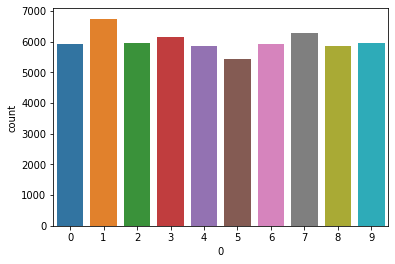

In [9]:
sns.countplot(train_Y[0])

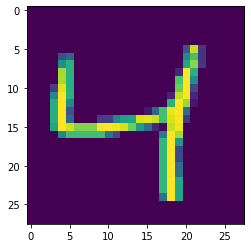

In [10]:
img = np.reshape(trainX[2], (28,28))
plt.imshow(img)

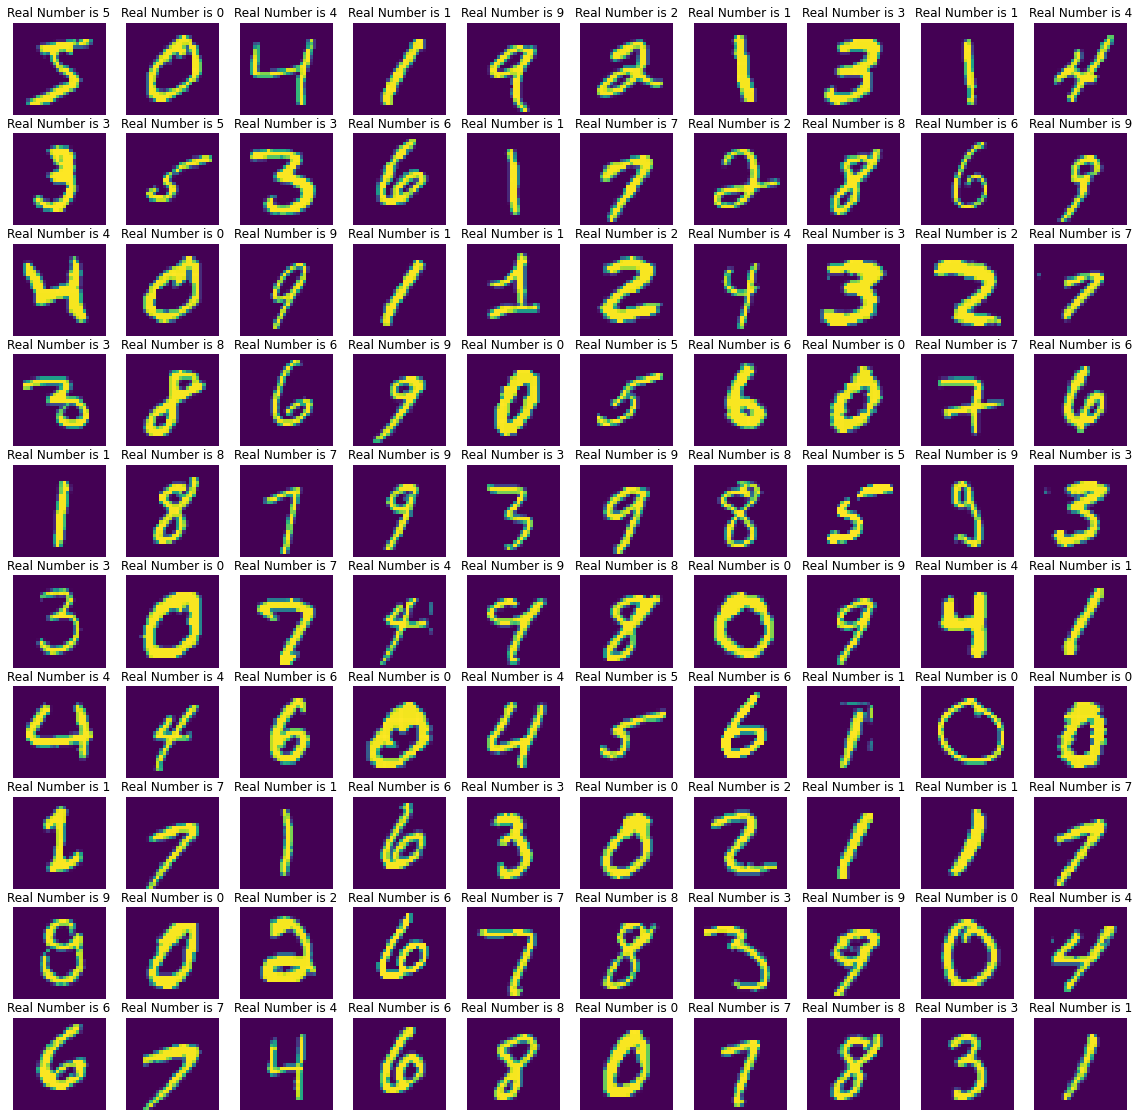

In [11]:
x = np.array(train_X).reshape(-1,28,28,1)
test = np.array(test_X).reshape(-1,28,28,1)
fig, axis = plt.subplots(10, 10, figsize=(20, 20))
for i, ax in enumerate(axis.flat):
    ax.imshow(x[i].reshape(28,28))
    ax.axis('off')
    ax.set(title = f"Real Number is {trainY[i]}")

In [12]:
x.reshape(-1,784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
train_Y[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [14]:
train_X.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [15]:
test_X.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [16]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 44.9 MB


In [17]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 7.5 MB


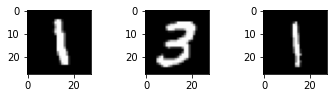

In [18]:
for i in range(6,9):
  plt.subplot(330+(i+1))
  plt.imshow(trainX[i],cmap='gray')

I check for corrupted images (missing values inside).

There is no missing values in the train and test dataset. So we can safely go ahead.

In [19]:
train_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
Y_train=to_categorical(trainY,num_classes=10)
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Feature Engineering/Selection, Dimensionality Reduction

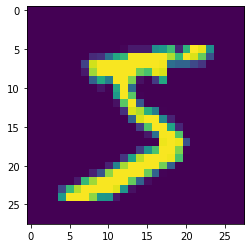

In [21]:
train_X=train_X/255
test_X=test_X/255
train_X.head()

plt.imshow(np.array(train_X.iloc[0,:]).reshape(28,28))


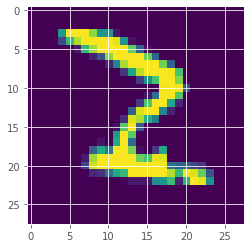

In [86]:
import cv2
from google.colab.patches import cv2_imshow
#b='/content/drive/My Drive/IMG_20180909_194929.jpg'
a=np.array(train_X.iloc[0,:]).reshape(28,28)
a.shape
#cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
#cv2_imshow(a)
#plt.imshow(a)
fl0=cv2.flip(a,0)
plt.imshow(fl0)


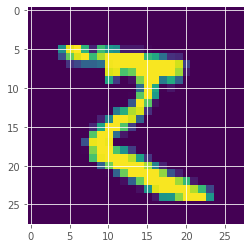

In [87]:
fl1=cv2.flip(a,1)

plt.imshow(fl1)

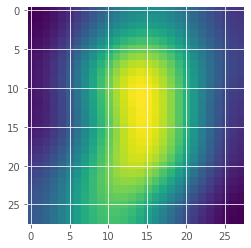

In [89]:
from scipy import ndimage
a=np.array(train_X.iloc[0,:]).reshape(28,28)

img = ndimage.gaussian_filter(a, sigma= 5.11)
plt.imshow(img)

Model Building
Let's now build the model and tune the hyperparameters. Let's start with a linear model first.

Linear SVM

SVM


In [13]:

from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(train_X[0:10000], train_Y[0:10000])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [17]:
predictions = svm_linear.predict(test_X[0:1000])
predictions[:1000]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 7, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 2, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 4, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 7, 2, 2, 4, 1, 5, 3,
       8, 7, 2, 5, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 3, 2, 9, 2, 0, 4, 0, 0, 2, 3, 4,

In [18]:
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i 
# but predicted to be in class j
confusion = metrics.confusion_matrix(y_true = test_Y[0:1000], y_pred = predictions)
confusion

array([[ 80,   0,   2,   0,   0,   2,   1,   0,   0,   0],
       [  0, 125,   0,   0,   0,   0,   1,   0,   0,   0],
       [  1,   0, 102,   1,   0,   0,   1,   3,   6,   2],
       [  1,   1,   2,  92,   0,   6,   1,   1,   2,   1],
       [  0,   0,   2,   0, 106,   0,   0,   0,   0,   2],
       [  1,   0,   0,   4,   0,  77,   1,   0,   2,   2],
       [  3,   0,   1,   0,   1,   1,  81,   0,   0,   0],
       [  1,   0,   2,   2,   1,   0,   0,  89,   1,   3],
       [  0,   0,   2,   6,   3,   0,   0,   1,  77,   0],
       [  0,   1,   0,   3,   4,   0,   0,   8,   0,  78]])

In [20]:
# measure accuracy
metrics.accuracy_score(y_true=test_Y[:1000], y_pred=predictions)

0.907

In [22]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=test_Y[:1000], y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        85
           1       0.98      0.99      0.99       126
           2       0.90      0.88      0.89       116
           3       0.85      0.86      0.86       107
           4       0.92      0.96      0.94       110
           5       0.90      0.89      0.89        87
           6       0.94      0.93      0.94        87
           7       0.87      0.90      0.89        99
           8       0.88      0.87      0.87        89
           9       0.89      0.83      0.86        94

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.91      0.91      0.91      1000



In [23]:
# run gc.collect() (garbage collect) to free up memory
# else, since the dataset is large and SVM is computationally heavy,
# it'll throw a memory error while training
gc.collect()

792

Non-Linear SVM¶


In [12]:

# rbf kernel with other hyperparameters kept to default 
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(train_X[:10000], train_Y[:10000])

NameError: ignored

In [25]:

# predict
predictions = svm_rbf.predict(test_X[:1000])

# accuracy 
print(metrics.accuracy_score(y_true=test_Y[:1000], y_pred=predictions))

0.947



The accuracy achieved with a non-linear kernel is slightly higher than a linear one. Let's now do a grid search CV to tune the hyperparameters C and gamma.

Grid Search Cross-Validation¶


In [11]:
# conduct (grid search) cross-validation to find the optimal values 
# of cost C and the choice of kernel

from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = svm.SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')

# fit
clf.fit(train_X[:10], train_Y[:10])

NameError: ignored

In [0]:
# results
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

In [0]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

From the plot above, we can observe that (from higher to lower gamma / left to right):

At very high gamma (0.01), the model is achieving 100% accuracy on the training data, though the test score is quite low (<75%). Thus, the model is overfitting.

At gamma=0.001, the training and test scores are comparable at around C=1, though the model starts to overfit at higher values of C

At gamma=0.0001, the model does not overfit till C=10 but starts showing signs at C=100. Also, the training and test scores are slightly lower than at gamma=0.001.

Thus, it seems that the best combination is gamma=0.001 and C=1 (the plot in the middle), which gives the highest test accuracy (~92%) while avoiding overfitting.

Let's now build the final model and see the performance on test data.

Final Model


In [0]:
# optimal hyperparameters
best_C = 1
best_gamma = 0.001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(train_X[:10000], train_Y[:10000])

In [0]:
predictions = svm_final.predict(test_X[:1000])

In [0]:
# evaluation: CM 
confusion = metrics.confusion_matrix(y_true = test_Y[:1000], y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=test_Y[:1000], y_pred=predictions)

print(test_accuracy, "\n")
print(confusion)


Conclusion
The final accuracy on test data is approx. 92%. Note that this can be significantly increased by using the entire training data of 42,000 images (we have used just 10% of that!).

RANDOM FOREST CLASSIFIER

In [0]:

#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [17]:
#fit a Random Forest classifier
clf=RandomForestClassifier()
clf.fit(train_X[:1000],train_Y[:1000])
prediction_validation = clf.predict(test_X[:100])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(test_Y[:100],prediction_validation)))


Validation Confusion Matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 1  0  6  0  0  0  0  1  0  0]
 [ 0  0  0 10  0  1  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  1]
 [ 0  0  1  1  1  4  0  0  0  0]
 [ 0  0  2  0  2  0  6  0  0  0]
 [ 0  0  0  0  1  0  0 13  0  1]
 [ 0  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1 10]]


KNN


In [0]:

# import the necessary packages
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
import sklearn
 

In [38]:
test_Y=np.ravel(test_Y)
train_Y=np.ravel(train_Y)
train_Y.shape,test_Y.shape


((60000,), (10000,))

In [44]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []
 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 30, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(train_X[:1000], train_Y[:1000])
 
	# evaluate the model and update the accuracies list
	score = model.score(test_X[:1000], test_Y[:1000])
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)
 
# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))

k=1, accuracy=82.80%
k=3, accuracy=81.40%
k=5, accuracy=81.50%
k=7, accuracy=80.50%
k=9, accuracy=80.90%
k=11, accuracy=79.50%
k=13, accuracy=78.80%
k=15, accuracy=77.90%
k=17, accuracy=78.30%
k=19, accuracy=77.00%
k=21, accuracy=76.00%
k=23, accuracy=75.20%
k=25, accuracy=75.60%
k=27, accuracy=74.80%
k=29, accuracy=74.00%
k=1 achieved highest accuracy of 82.80% on validation data


In [45]:
# re-train our classifier using the best k value and predict the labels of the
# test data
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(train_X[:1000], train_Y[:1000])
predictions = model.predict(test_X[:1000])
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(test_Y[:1000], predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        85
           1       0.88      1.00      0.93       126
           2       0.92      0.79      0.85       116
           3       0.85      0.71      0.78       107
           4       0.87      0.72      0.79       110
           5       0.72      0.72      0.72        87
           6       0.84      0.93      0.89        87
           7       0.80      0.90      0.85        99
           8       0.88      0.65      0.75        89
           9       0.67      0.89      0.77        94

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.82      1000
weighted avg       0.84      0.83      0.83      1000



In [48]:

# loop over a few random digits
for i in list(map(int, np.random.randint(0, high=len(test_Y[:1000]), size=(5,)))):
	# grab the image and classify it
	image = test_X[i]
	prediction = model.predict(image.reshape(1, -1))[0]
 
	# convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
	# then resize it to 32 x 32 pixels so we can see it better
	image = image.reshape((8, 8)).astype("uint8")
	image = exposure.rescale_intensity(image, out_range=(0, 255))
	image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
 
	# show the prediction
	print("I think that digit is: {}".format(prediction))
	cv2.imshow("Image", image)
	cv2.waitKey(0)

AttributeError: ignored

END OF KNN


In [0]:

#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

USING CNN

In [22]:
X_train=np.reshape(trainX,(trainX.shape[0],28,28,1))/255
X_test=np.reshape(testX,(testX.shape[0],28,28,1))/255
Y_train=to_categorical(trainY,num_classes=10)
Y_test=to_categorical(testY,num_classes=10)

X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [0]:
X_final_train=X_train[100]
X_final_test=X_test[100]
Y_final_train=Y_train[100]
Y_final_test=Y_test[100]

In [0]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [0]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)


In [27]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
H=model.fit(x=X_train,y=trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 33s 556us/step - loss: 0.2041 - accuracy: 0.9387
Epoch 2/10
60000/60000 [==============================] - 33s 548us/step - loss: 0.0833 - accuracy: 0.9747
Epoch 3/10
60000/60000 [==============================] - 33s 547us/step - loss: 0.0596 - accuracy: 0.9813
Epoch 4/10
60000/60000 [==============================] - 33s 544us/step - loss: 0.0446 - accuracy: 0.9853
Epoch 5/10
60000/60000 [==============================] - 33s 545us/step - loss: 0.0357 - accuracy: 0.9885
Epoch 6/10
60000/60000 [==============================] - 33s 544us/step - loss: 0.0293 - accuracy: 0.9903
Epoch 7/10
60000/60000 [==============================] - 33s 546us/step - loss: 0.0252 - accuracy: 0.9918
Epoch 8/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.0230 - accuracy: 0.9920
Epoch 9/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0182 - accuracy: 0.9939
Epoch 10/10
60000/60000 [============

In [33]:
model.evaluate(X_test,testY)


10000/10000 [==============================] - 2s 166us/step


[0.060314512178686594, 0.9850000143051147]

9


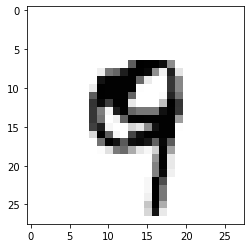

In [29]:

image_index = 4444
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [30]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(X_test)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(Y_test.argmax(axis=1), predIdxs,
	target_names=['0','1','2','3','4','5','6','7','8','9']))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



In [31]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(Y_test.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[ 971    0    3    0    0    1    2    2    1    0]
 [   0 1124    2    1    0    2    4    1    1    0]
 [   2    2 1012    0    1    0    2    9    3    1]
 [   1    0    3  999    0    3    0    3    1    0]
 [   0    0    3    0  963    0    1    1    1   13]
 [   1    0    0   10    0  874    3    1    2    1]
 [   6    2    0    0    1    3  943    0    3    0]
 [   0    1    3    0    1    0    0 1021    1    1]
 [   2    0    3    3    1    0    0    4  958    3]
 [   1    1    0    5    8    2    0    5    2  985]]
acc: 0.2095
sensitivity: 1.0000
specificity: 1.0000


KeyError: ignored

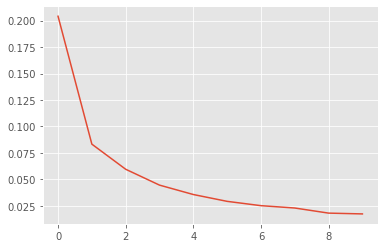

In [34]:
# plot the training loss and accuracy
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

SystemError: ignored

In [65]:
a.shape,c.shape

((3456, 4608, 3), (3456, 4608))

In [66]:
c

array([[ 57,  58,  59, ...,  97, 107,  98],
       [ 56,  57,  58, ...,  95, 101,  92],
       [ 55,  56,  56, ...,  96, 102,  96],
       ...,
       [ 47,  52,  51, ...,  90,  91,  82],
       [ 47,  52,  51, ...,  87,  91,  85],
       [ 46,  51,  50, ...,  87,  94,  90]], dtype=uint8)

In [73]:
a.shape

(28, 28)

11493376/11490434 [==============================] - 2s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


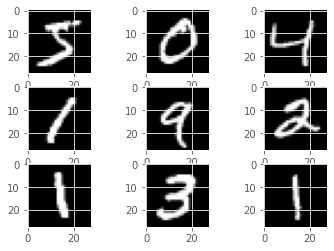

In [110]:

# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [0]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [0]:

# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)